In [ ]:
!nvidia-smi

Thu Dec 17 14:43:39 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P8    12W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## CRAFT Dectection

In [ ]:
%cd
%cd /content/drive/MyDrive/Colab Notebooks/CRAFT-pytorch

/root
/content/drive/MyDrive/Colab Notebooks/CRAFT-pytorch


In [ ]:
#!pip install -r requirements.txt

In [ ]:
#!python test.py

In [ ]:
  !pip install craft-text-detector

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 28.3MB 115kB/s 
  Created wheel for gdown: filename=gdown-3.12.2-cp36-none-any.whl size=9694 sha256=0c1e871f3882e363d96084bd65f8c8f89eb39835dae23c26d75d1f156f345dc5
  Stored in directory: /root/.cache/pip/wheels/81/d0/d7/d9983facc6f2775411803e0e2d30ebf98efbf2fc6e57701e09
Successfully built gdown
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: gdown 3.6.4
    Uninstalling gdown-3.6.4:
      Successfully uninstalled gdown-3.6.4
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30


In [ ]:
# import craft functions
from craft_text_detector import (
    read_image,
    load_craftnet_model,
    load_refinenet_model,
    get_prediction,
    export_detected_regions,
    export_extra_results,
    empty_cuda_cache
)

# set image path and export folder directory
image_path = 'data/test.jpg'
output_dir = 'outputs/'

# read image
image = read_image(image_path)

# load models
refine_net = load_refinenet_model(cuda=True)
craft_net = load_craftnet_model(cuda=True)

# perform prediction
prediction_result = get_prediction(
    image=image,
    craft_net=craft_net,
    refine_net=refine_net,
    text_threshold=0.7,
    link_threshold=0.4,
    low_text=0.4,
    cuda=True,
    long_size=1280
)

# export detected text regions
exported_file_paths = export_detected_regions(
    image_path=image_path,
    image=image,
    regions=prediction_result["boxes"],
    output_dir=output_dir,
    rectify=True
)

# export heatmap, detection points, box visualization
export_extra_results(
    image_path=image_path,
    image=image,
    regions=prediction_result["boxes"],
    heatmaps=prediction_result["heatmaps"],
    output_dir=output_dir
)

# unload models from gpu
empty_cuda_cache()

Craft text refiner weight will be downloaded to /root/.craft_text_detector/weights/craft_refiner_CTW1500.pth


Downloading...
From: https://drive.google.com/uc?id=1xcE9qpJXp4ofINwXWVhhQIh9S8Z7cuGj
To: /root/.craft_text_detector/weights/craft_refiner_CTW1500.pth
100%|██████████| 1.85M/1.85M [00:00<00:00, 161MB/s]


Craft text detector weight will be downloaded to /root/.craft_text_detector/weights/craft_mlt_25k.pth


Downloading...
From: https://drive.google.com/uc?id=1bupFXqT-VU6Jjeul13XP7yx2Sg5IHr4J
To: /root/.craft_text_detector/weights/craft_mlt_25k.pth
83.2MB [00:00, 101MB/s] 


## VietOCR

In [ ]:
! pip install --quiet vietocr==0.3.5

     |████████████████████████████████| 61kB 5.4MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 952kB 9.6MB/s 
     |████████████████████████████████| 880kB 15.9MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.4.0 which is incompatible.


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

In [ ]:
config = Cfg.load_config_from_name('vgg_seq2seq')

In [ ]:
# config['weights'] = './weights/transformerocr.pth'
# config['weights'] = 'https://drive.google.com/uc?id=13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA'
config['cnn']['pretrained']=False
config['device'] = 'cuda:0'
config['predictor']['beamsearch']=False

In [ ]:
detector = Predictor(config)

Cached Downloading: /root/.cache/gdown/https-COLON--SLASH--SLASH-drive.google.com-SLASH-uc-QUESTION-id-EQUAL-1nTKlEog9YFK74kPyX0qLwCWi60_YHHk4
Downloading...
From: https://drive.google.com/uc?id=1nTKlEog9YFK74kPyX0qLwCWi60_YHHk4
To: /root/.cache/gdown/tmpn34qva8b/dl
89.6MB [00:01, 68.3MB/s]


In [ ]:
#! gdown --id 1uMVd6EBjY4Q0G2IkU5iMOQ34X0bysm0b
#! unzip  -qq -o sample.zip

In [ ]:
#! ls sample | shuf |head -n 5

## Crop Image

In [ ]:
%cd outputs/

/content/drive/My Drive/Colab Notebooks/CRAFT-pytorch/outputs


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
image = cv2.imread('test.jpg')

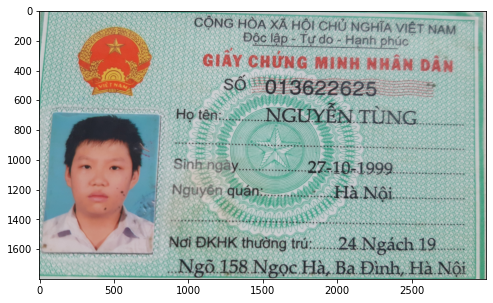

In [ ]:
plt.subplots(figsize = (8, 8))
plt.imshow(image[:, :, ::-1])

In [ ]:
filename = 'test_text_detection.txt'
with open(filename) as f:
    content = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content = [x.strip() for x in content] 

In [ ]:
boxes = []
for line in content:
  box = []
  num = ''
  for c in line:
    if c != ',':
      num = num + c
    else:
      box.append(int(num))
      num = ''
    #box.append(box[5])
  boxes.append(box)

In [ ]:
for box in boxes:
  box.append(box[5])

In [ ]:
content[:5]

['1041,25,2805,73,2802,167,1038,120',
 '1373,136,2485,159,2483,252,1371,229',
 '1102,254,2786,293,2783,418,1099,379',
 '1237,445,1392,445,1392,539,1237,539',
 '1519,451,2275,465,2272,583,1517,569']

In [ ]:
boxes[:5]

[[1041, 25, 2805, 73, 2802, 167, 1038, 167],
 [1373, 136, 2485, 159, 2483, 252, 1371, 252],
 [1102, 254, 2786, 293, 2783, 418, 1099, 418],
 [1237, 445, 1392, 445, 1392, 539, 1237, 539],
 [1519, 451, 2275, 465, 2272, 583, 1517, 583]]

In [ ]:
sizes = []
for box in boxes:
  dic = {
  'xmin': box[0],
  'xmax': box[2], 
  'ymin': box[1] - int((box[7] - box[1])/4),
  'ymax': box[7]
  }
  sizes.append(dic)

In [ ]:
text_crs = []
for size in sizes:
  xmin = size['xmin']
  xmax = size['xmax']
  ymin = size['ymin']
  ymax = size['ymax']
  top_left = [xmin, ymin]
  top_right = [xmax, ymin]
  bottom_right = [xmax, ymax]
  bottom_left = [xmin, ymax]
  text_crs.append([top_left, top_right, bottom_right, bottom_left])

In [ ]:
sizes[0]['xmax']

2805

In [ ]:
image.shape

(1800, 3000, 3)

In [ ]:
cropped_images = []
raw_image = image
for size in sizes:
  cropped_img = raw_image[size['ymin']:size['ymax'],
                          size['xmin']:size['xmax'],
                          :]
  noise = np.zeros((cropped_img.shape[0], 20, cropped_img.shape[2]))
  img = np.concatenate((cropped_img, noise), axis = 1)
  cropped_images.append(img)

In [ ]:
len(cropped_images)

15

In [ ]:
coordinates = []
for i in range(len(cropped_images)):
  if cropped_images[i].shape[0] != 0:
    coordinates.append(sizes[i])
    cv2.imwrite('sample/ocr'+str(i)+'.png', cropped_images[i])

## OCR

In [ ]:
import os

In [ ]:
fnames = os.listdir('sample/')

In [ ]:
fnames[:2]

['ocr1.png', 'ocr2.png']

In [ ]:
predictions = []
predictions_crsonly = []
predictions_textonly = []
for i, name in enumerate(fnames):
  img = Image.open('sample/'+name)
  predictions_textonly.append(detector.predict(img))
  predictions_crsonly.append(coordinates[i])
  predictions.append({
      'text': detector.predict(img),
      'coordinate': coordinates[i]})

In [ ]:
predictions_crsonly

[{'xmax': 2485, 'xmin': 1373, 'ymax': 252, 'ymin': 107},
 {'xmax': 2786, 'xmin': 1102, 'ymax': 418, 'ymin': 213},
 {'xmax': 1392, 'xmin': 1237, 'ymax': 539, 'ymin': 422},
 {'xmax': 2275, 'xmin': 1519, 'ymax': 583, 'ymin': 418},
 {'xmax': 562, 'xmin': 403, 'ymax': 515, 'ymin': 474},
 {'xmax': 2543, 'xmin': 1524, 'ymax': 776, 'ymin': 571},
 {'xmax': 1210, 'xmin': 919, 'ymax': 741, 'ymin': 629},
 {'xmax': 1348, 'xmin': 906, 'ymax': 1098, 'ymin': 951},
 {'xmax': 2378, 'xmin': 1800, 'ymax': 1109, 'ymin': 969},
 {'xmax': 1510, 'xmin': 891, 'ymax': 1271, 'ymin': 1123},
 {'xmax': 2381, 'xmin': 1978, 'ymax': 1275, 'ymin': 1140},
 {'xmax': 1843, 'xmin': 872, 'ymax': 1627, 'ymin': 1464},
 {'xmax': 2672, 'xmin': 2006, 'ymax': 1648, 'ymin': 1473},
 {'xmax': 2874, 'xmin': 937, 'ymax': 1809, 'ymin': 1621}]

In [ ]:
predictions_textonly

['Độc lập - Tự do - Hạnh phúc',
 'NGIẤY CHỨNG MINH NHÂN DÂN',
 'SỐ',
 '013622625',
 'VIÊTNA',
 'NGUYỄN TÙNG',
 'Họ tên',
 'Sinh ngay',
 '27-10-1999',
 'Nguyễn quán',
 'Hà Nội',
 'Nơi ĐKHK thường trú:',
 '24 Ngách 19',
 'Ngô 158 Ngọc Hà, Ba Đình, Hà Nội']

In [ ]:
predictions

[{'coordinate': {'xmax': 2485, 'xmin': 1373, 'ymax': 252, 'ymin': 107},
  'text': 'Độc lập - Tự do - Hạnh phúc'},
 {'coordinate': {'xmax': 2786, 'xmin': 1102, 'ymax': 418, 'ymin': 213},
  'text': 'NGIẤY CHỨNG MINH NHÂN DÂN'},
 {'coordinate': {'xmax': 1392, 'xmin': 1237, 'ymax': 539, 'ymin': 422},
  'text': 'SỐ'},
 {'coordinate': {'xmax': 2275, 'xmin': 1519, 'ymax': 583, 'ymin': 418},
  'text': '013622625'},
 {'coordinate': {'xmax': 562, 'xmin': 403, 'ymax': 515, 'ymin': 474},
  'text': 'VIÊTNA'},
 {'coordinate': {'xmax': 2543, 'xmin': 1524, 'ymax': 776, 'ymin': 571},
  'text': 'NGUYỄN TÙNG'},
 {'coordinate': {'xmax': 1210, 'xmin': 919, 'ymax': 741, 'ymin': 629},
  'text': 'Họ tên'},
 {'coordinate': {'xmax': 1348, 'xmin': 906, 'ymax': 1098, 'ymin': 951},
  'text': 'Sinh ngay'},
 {'coordinate': {'xmax': 2378, 'xmin': 1800, 'ymax': 1109, 'ymin': 969},
  'text': '27-10-1999'},
 {'coordinate': {'xmax': 1510, 'xmin': 891, 'ymax': 1271, 'ymin': 1123},
  'text': 'Nguyễn quán'},
 {'coordinate':

## Key Value problem

In [ ]:
import re
import math

In [ ]:
def no_accent_vietnamese(s):
    s = re.sub('[áàảãạăắằẳẵặâấầẩẫậ]', 'a', s)
    s = re.sub('[ÁÀẢÃẠĂẮẰẲẴẶÂẤẦẨẪẬ]', 'A', s)
    s = re.sub('[éèẻẽẹêếềểễệ]', 'e', s)
    s = re.sub('[ÉÈẺẼẸÊẾỀỂỄỆ]', 'E', s)
    s = re.sub('[óòỏõọôốồổỗộơớờởỡợ]', 'o', s)
    s = re.sub('[ÓÒỎÕỌÔỐỒỔỖỘƠỚỜỞỠỢ]', 'O', s)
    s = re.sub('[íìỉĩị]', 'i', s)
    s = re.sub('[ÍÌỈĨỊ]', 'I', s)
    s = re.sub('[úùủũụưứừửữự]', 'u', s)
    s = re.sub('[ÚÙỦŨỤƯỨỪỬỮỰ]', 'U', s)
    s = re.sub('[ýỳỷỹỵ]', 'y', s)
    s = re.sub('[ÝỲỶỸỴ]', 'Y', s)
    s = re.sub('đ', 'd', s)
    s = re.sub('Đ', 'D', s)
    s = re.sub(':', '', s)
    return s

def remove_special_chr(s):
  alphanumeric = ""
  for character in s:
    if character.isalnum():
        alphanumeric += character
  return alphanumeric

In [ ]:
real_keys = ['Số: ', 'Họ tên: ', 'Sinh ngày: ', 'Nguyên quán: ', 'Nơi ĐKHK thường trú: ']
no_accent_keys = ['sinh ngay', 'nguyen quan']

In [ ]:
keys_crs = []
non_keys = predictions_textonly
for i in range(len(predictions_textonly)):
  if str.lower(no_accent_vietnamese(predictions_textonly[i])) in no_accent_keys:
    #print(predictions_textonly[i])
    keys_crs.append(predictions[i]['coordinate'])

In [ ]:
keys_crs

[{'xmax': 1348, 'xmin': 906, 'ymax': 1098, 'ymin': 951},
 {'xmax': 1510, 'xmin': 891, 'ymax': 1271, 'ymin': 1123}]

In [ ]:
# fine number of ID card and name
for txt in predictions_textonly:
  if len(list(txt)) == 9 and txt.isnumeric():
    IDnumber = txt
  if txt.isupper():
    name = txt

In [ ]:
def norm2(p1, p2):
  return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)
def norm3(numbers):
  if (len(numbers)<2):
    return
  if ((len(numbers)==2)  and (numbers[0] == numbers[1]) ):
    return
  dup_items = set()
  uniq_items = []
  for x in numbers:
    if x not in dup_items:
      uniq_items.append(x)
      dup_items.add(x)
  uniq_items.sort()    
  return  uniq_items[1]

In [ ]:
values = []
for key_crs in keys_crs:
  center_right = [key_crs['xmax'], int((key_crs['ymax'] + key_crs['ymin'])/2)]
  dis = []
  for i, crs in enumerate(predictions_crsonly):
    center_left = [crs['xmin'], int((crs['ymax'] + crs['ymin'])/2)]
    dis.append(norm2(center_right, center_left))
  min_index = dis.index(min(dis))
  value = predictions_textonly[min_index]
  values.append(value)

In [ ]:
values1 = []
for key_crs in keys_crs:
  center_right = [key_crs['xmax'], int((key_crs['ymax'] + key_crs['ymin'])/2)]
  dis = []
  for i, crs in enumerate(predictions_crsonly):
    center_left = [crs['xmin'], int((crs['ymax'] + crs['ymin'])/2)]
    dis.append(abs(center_right[1] - center_left[1]))
  min_index = dis.index(norm3(dis))
  value = predictions_textonly[min_index]
  values1.append(value)

In [ ]:
values1

['27-10-1999', 'Hà Nội']

In [ ]:
# Noi DKHK thuong tru
for i, txt in enumerate(predictions_textonly):
  if str.lower(no_accent_vietnamese(txt)) == 'noi dkhk thuong tru':
    key_crs = predictions_crsonly[i]
    center_right = [key_crs['xmax'], int((key_crs['ymax'] + key_crs['ymin'])/2)]
    bottom_left = [key_crs['xmin'], key_crs['ymax']]
    dis1 = []
    dis2 = []
    for i, crs in enumerate(predictions_crsonly):
      center_left = [crs['xmin'], int((crs['ymax'] + crs['ymin'])/2)]
      top_left =  [crs['xmin'], crs['ymin']]
      dis1.append(norm2(center_right, center_left))
      dis2.append(norm2(top_left, bottom_left))
    min_index1 = dis1.index(min(dis1))
    min_index2 = dis2.index(min(dis2))
    value1 = predictions_textonly[min_index1]
    value2 = predictions_textonly[min_index2]
address = value1 + ' ' + value2

In [ ]:
values = [IDnumber, name, values1[0], values1[1], address]

In [ ]:
def prt_result():
  for i, key in enumerate(real_keys):
    print(key, values[i])

In [ ]:
prt_result()

Số:  013622625
Họ tên:  NGUYỄN TÙNG
Sinh ngày:  27-10-1999
Nguyên quán:  Hà Nội
Nơi ĐKHK thường trú:  24 Ngách 19 Ngô 158 Ngọc Hà, Ba Đình, Hà Nội
